In [1]:
# !pip install lime

In [74]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import explained_variance_score , mean_squared_error, r2_score

import psycopg2
import matplotlib. pyplot as plt 
import seaborn as sns

from collections import Counter
from config import password

In [3]:
# Load the pga data set dataset from database 
connection_string = f"host=red-team-final.c3yshvuxvm9x.us-east-2.rds.amazonaws.com dbname=red-team port=5432 user=postgres password={password}"
connection = psycopg2.connect(connection_string)

In [4]:
# Establish connection and db
sql = "select * from pga_stats"
pga_df = pd.read_sql(sql, connection)

In [44]:
# Show df
pga_df = pga_df.rename(columns={"money_MONEY":"Winnings"})
pga_df

,SG_off_tee_AVERAGE,SG_tee_green_AVERAGE,driving_dist_AVG.,pct_ydg_tee_AVG (%),driving_320+_%,SG_approach_green_AVERAGE,GIR_pct_%,GOFIR_pct_%,GIR_pct_fwy_%,GIR_pct_not_fwy_%,...,pct_sand_save_%,scrambling_%,SG_putt_AVERAGE,pct_one_putt_%,pct_three_putt_avoid_%,putt_avg_AVG,putts_per_rd_AVG,bogey_avoid_% MAKES BOGEY,btb_ratio_BIRDIE TO BOGEY RATIO,Winnings
0,1.144,2.099,321.1,66.80,51.47,0.696,66.67,80.34,80.87,50.25,...,48.89,61.27,0.435,41.01,3.27,1.752,28.74,14.54,1.84,5443091
1,0.841,1.700,307.1,64.01,29.17,0.582,72.11,85.90,83.80,57.32,...,50.00,63.07,-0.019,38.43,2.55,1.750,29.04,14.00,1.79,3556232
2,0.774,1.064,318.2,64.96,48.68,0.178,65.35,74.37,79.47,53.10,...,57.35,57.81,0.040,42.11,3.36,1.743,28.76,17.11,1.48,1782342
3,0.610,0.833,299.9,63.64,13.28,0.553,73.18,79.81,80.52,65.29,...,46.05,61.49,-0.013,37.67,2.52,1.756,29.30,12.50,1.91,1482028
4,0.567,0.563,287.4,60.36,8.33,-0.088,64.81,68.25,72.54,51.09,...,52.50,60.53,-0.793,39.12,2.78,1.779,29.25,15.74,1.15,164271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,-0.063,0.284,300.9,63.32,16.67,0.585,66.43,73.44,76.26,54.23,...,56.10,58.99,-0.113,36.55,3.22,1.807,29.45,16.26,1.17,824162
461,-0.417,-0.168,278.7,60.89,1.92,-0.006,63.53,68.20,73.63,48.14,...,54.17,62.30,0.451,42.02,1.42,1.748,28.32,15.03,1.27,942372
462,0.022,-0.402,285.1,62.05,1.69,-0.429,64.69,69.61,77.00,52.37,...,51.35,58.67,-0.006,38.51,2.73,1.779,29.15,16.95,1.14,332352
463,0.255,0.325,296.4,63.35,13.27,0.251,66.07,71.07,76.71,51.13,...,51.45,56.98,0.154,38.78,3.05,1.772,29.08,17.05,1.24,1943309


In [84]:
# Define the features set as everything but money 
X = pga_df.drop(columns=["Winnings", "SG_tee_green_AVERAGE", "driving_320+_%", "GOFIR_pct_%", "pct_one_putt_%", "pct_three_putt_avoid_%", "bogey_avoid_% MAKES BOGEY", "btb_ratio_BIRDIE TO BOGEY RATIO", "GIR_pct_fwy_%","pct_sand_save_%", "pct_ydg_tee_AVG (%)", "GIR_pct_%", "GIR_pct_not_fwy_%", "scrambling_%"], axis=1)
X

,SG_off_tee_AVERAGE,driving_dist_AVG.,SG_approach_green_AVERAGE,fwy_prox_AVG,rough_prox_AVG,SG_ATG_AVERAGE,SG_putt_AVERAGE,putt_avg_AVG,putts_per_rd_AVG
0,1.144,321.1,0.696,374,572,0.259,0.435,1.752,28.74
1,0.841,307.1,0.582,372,612,0.326,-0.019,1.750,29.04
2,0.774,318.2,0.178,385,583,0.112,0.040,1.743,28.76
3,0.610,299.9,0.553,347,491,-0.329,-0.013,1.756,29.30
4,0.567,287.4,-0.088,387,543,0.084,-0.793,1.779,29.25
...,...,...,...,...,...,...,...,...,...
460,-0.063,300.9,0.585,345,481,-0.238,-0.113,1.807,29.45
461,-0.417,278.7,-0.006,373,544,0.254,0.451,1.748,28.32
462,0.022,285.1,-0.429,399,539,0.006,-0.006,1.779,29.15
463,0.255,296.4,0.251,381,540,-0.182,0.154,1.772,29.08


In [85]:
# Define the target set as Money/ Earning PGA
y = pga_df[["Winnings"]]
y.head()

,Winnings
0,5443091
1,3556232
2,1782342
3,1482028
4,164271


C:\Users\joela\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


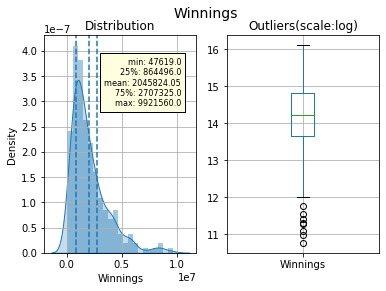

In [86]:
# Visualize distribution (ammended code from towarddatascience)
# Set variable
x = "Winnings"
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=14)

# Distribution
ax[0].title.set_text('Distribution')
var = pga_df[x].fillna(pga_df[x].mean())
breaks = np.quantile(var, q=np.linspace(0, 1, 11))
var = var[ (var > breaks[0]) & (var < 
                    breaks[10]) ]
sns.distplot(var, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = pga_df[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.9, 0.9, box, transform=ax[0].transAxes, fontsize=8, va='top', ha="right", bbox=dict(facecolor='lightyellow', alpha=1))

# Box plot 
ax[1].title.set_text('Outliers(scale:log)')
tmp_df = pd.DataFrame(pga_df[x])
tmp_df[x] = np.log(tmp_df[x])
tmp_df.boxplot(column=x, ax=ax[1])
plt.show()

<AxesSubplot:title={'center':'Correlation Matrix'}>

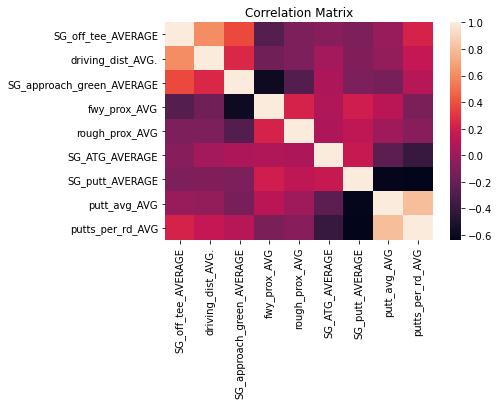

In [87]:
# Show correlation matrix
heatmap = X.corr(method="pearson")
plt.title("Correlation Matrix")
sns.heatmap(heatmap)

In [93]:
# Split Data into testing and training 
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(Counter(y_train))
print("--------------------------")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("--------------------------")
print("y_train mean:", round(np.mean(y_train),2))
print("--------------------------")
print("y_test mean:", round(np.mean(y_test),2))
print("--------------------------")

Counter({'Winnings': 1})
--------------------------
X_train shape: (348, 9)
X_test shape: (117, 9)
--------------------------
y_train mean: Winnings    2061588.85
dtype: float64
--------------------------
y_test mean: Winnings    1998933.85
dtype: float64
--------------------------


In [94]:
# Create a scaler instance
scaler = StandardScaler()

# Fit
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [95]:
# Call Linear Regression model
model = linear_model.LinearRegression()

# Train data to model
model.fit(X_train_scaled, y_train)

LinearRegression()

In [96]:
# Predict
y_pred = model.predict(X_test_scaled)

Feature: 0, Score: 518672.31143
Feature: 1, Score: 273444.44897
Feature: 2, Score: 534501.16397
Feature: 3, Score: -152236.76721
Feature: 4, Score: -18198.39874
Feature: 5, Score: 325845.67239
Feature: 6, Score: 482075.29311
Feature: 7, Score: -181467.30535
Feature: 8, Score: -53267.33114


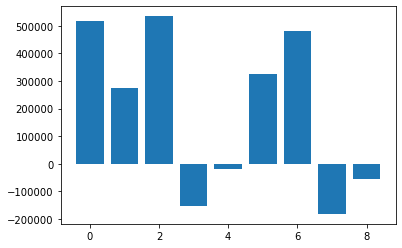

,Coefficients
Feature,
SG_approach_green_AVERAGE,534501.163968
SG_off_tee_AVERAGE,518672.311431
SG_putt_AVERAGE,482075.293109
SG_ATG_AVERAGE,325845.672387
driving_dist_AVG.,273444.448972
rough_prox_AVG,-18198.398742
putts_per_rd_AVG,-53267.331140
fwy_prox_AVG,-152236.767214
putt_avg_AVG,-181467.305353


In [97]:
# Get feature importance
importance = model.coef_
importance = np.ravel(importance)

# Explore features
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefficients",model.coef_.transpose())
coef_table = coef_table.rename(columns={0: "Feature"}).set_index("Feature")

# Summarize importance
for i, j in enumerate(importance):
    print('Feature: %0d, Score: %.5f'% (i,j))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Display coefficients and features sorted by coefficient
sorted_feature_table = coef_table.sort_values(by=["Coefficients"], ascending=False)
sorted_feature_table

In [98]:
# Show explained variance
explained_variance_score(y_test, y_pred)

0.6704112626056835

In [99]:
# MSE
print('Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))

# Coefficient of determination (should match explained variance)
print('Coefficient of determination: %.2f'% r2_score(y_test, y_pred))

Mean squared error: 963845691681.73
Coefficient of determination: 0.67


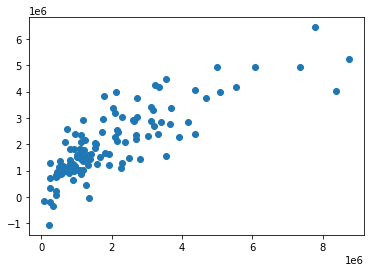

In [101]:
residuals = y_test - y_pred
plt.scatter(y_test,y_pred)
plt.show()